# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [316]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [281]:
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

In [282]:
df_load = pd.read_csv(path + '/bank_transactions_data_2.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [283]:
df_load

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [284]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [285]:
df_load.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [286]:
df_load.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


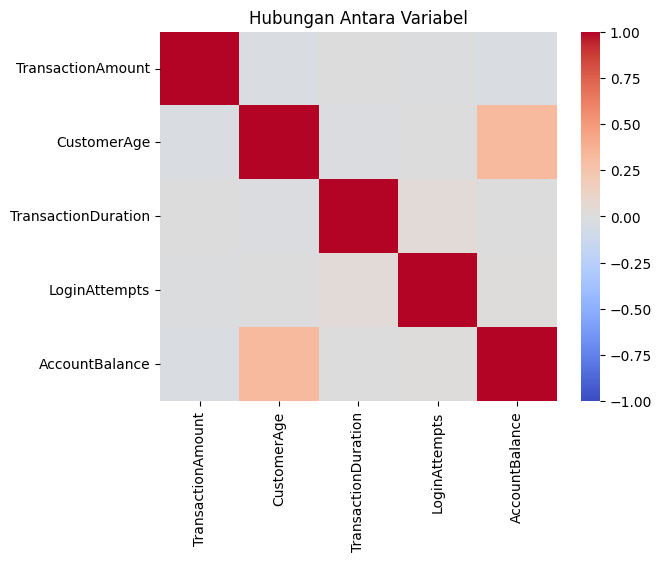

In [287]:
df_load_num = df_load.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_load_num.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hubungan Antara Variabel')
plt.show()

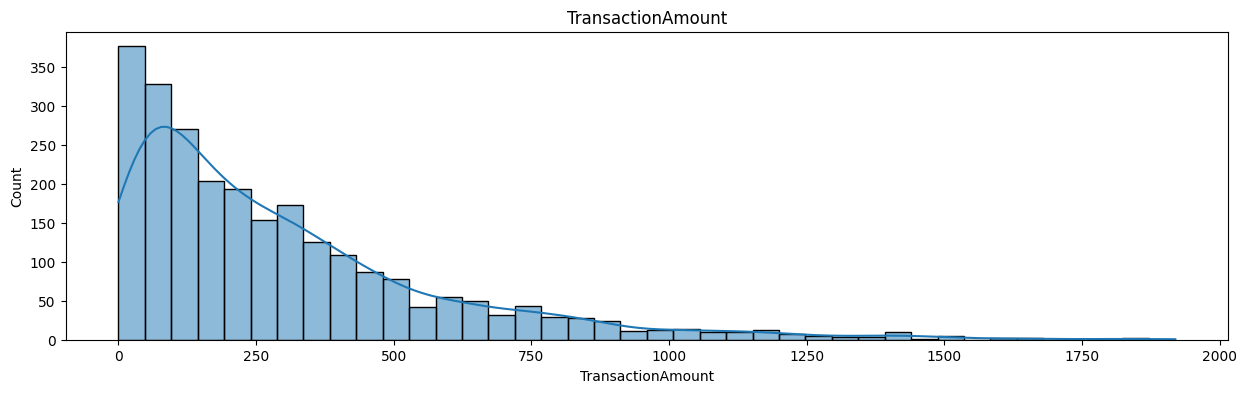

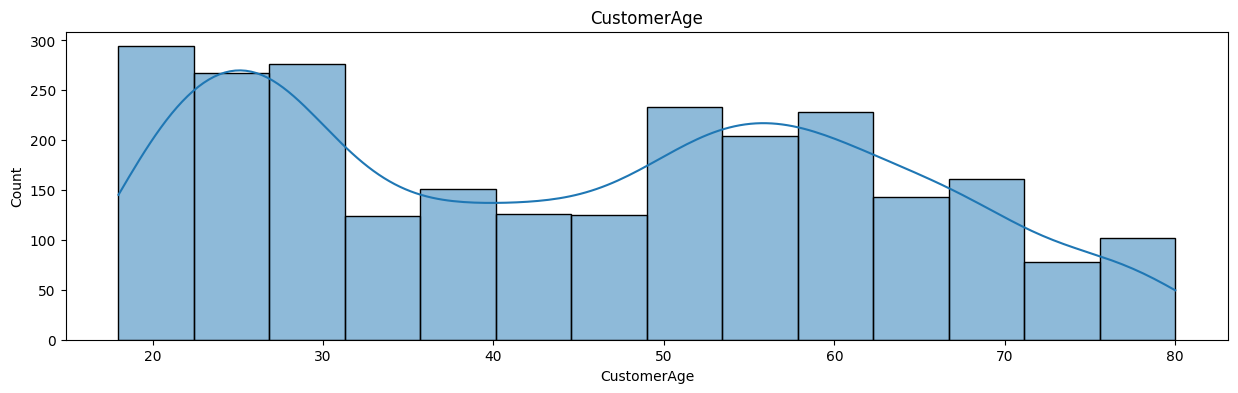

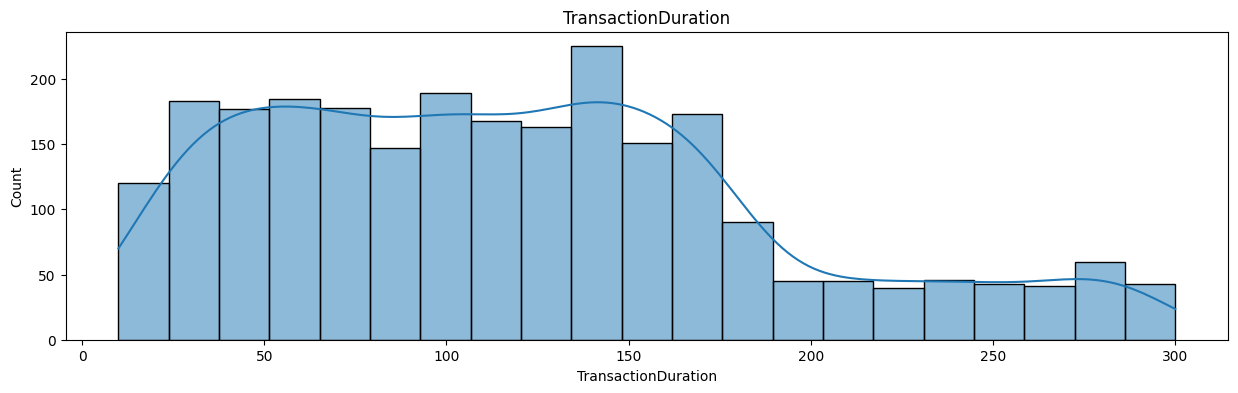

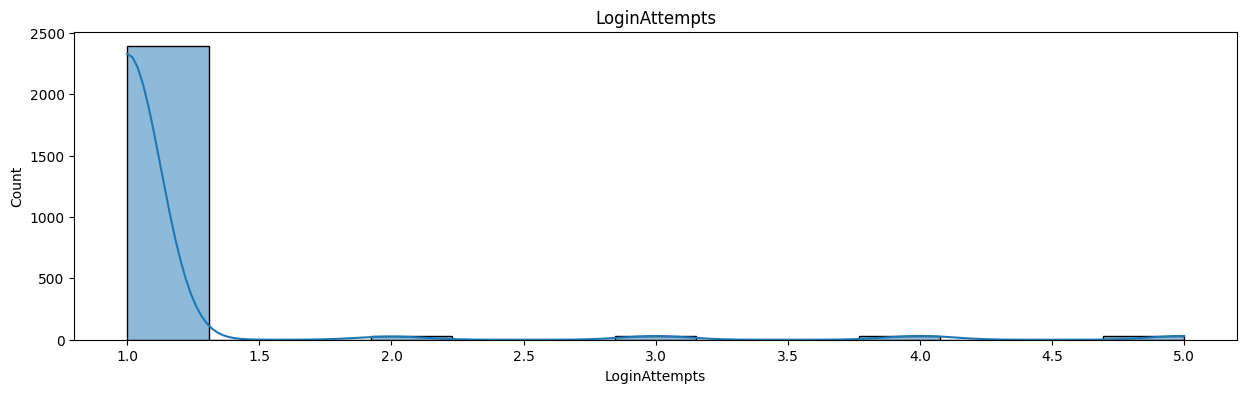

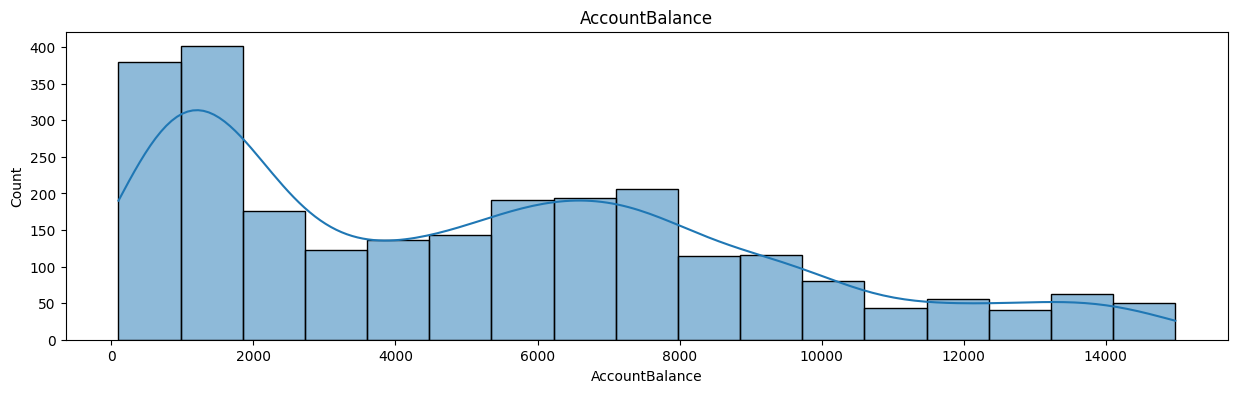

In [288]:
for i, column in enumerate(df_load_num, 1):
    plt.figure(figsize=(15, 4))
    sns.histplot(df_load_num[column], kde=True)
    plt.title(column)

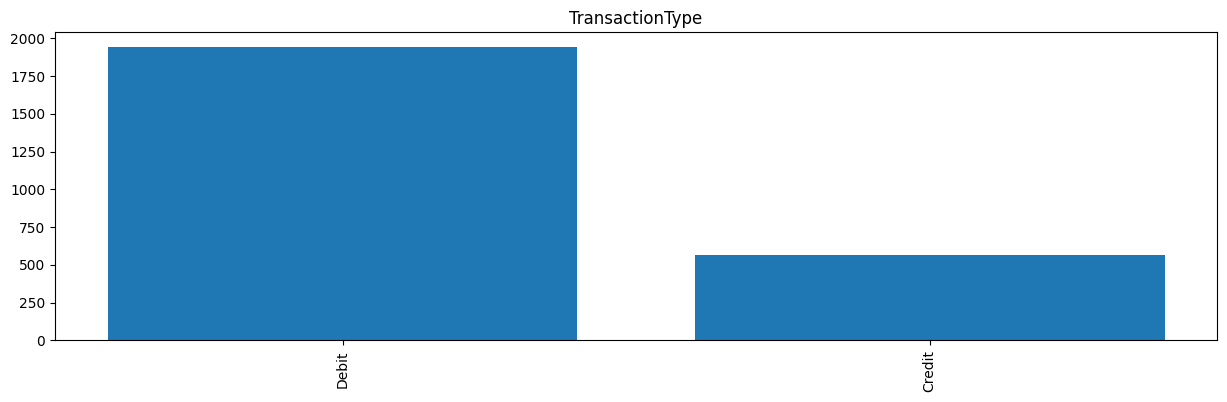

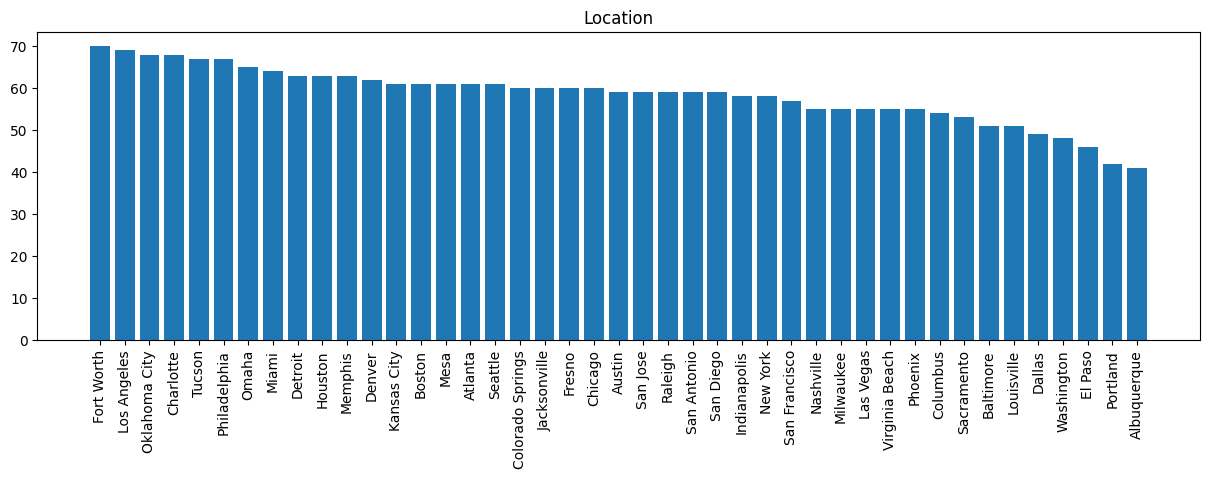

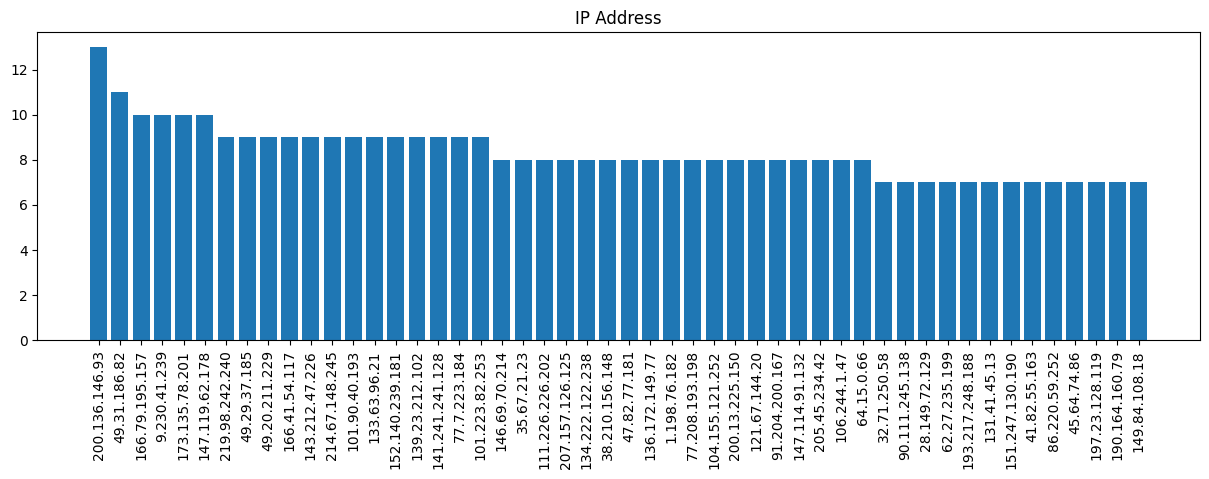

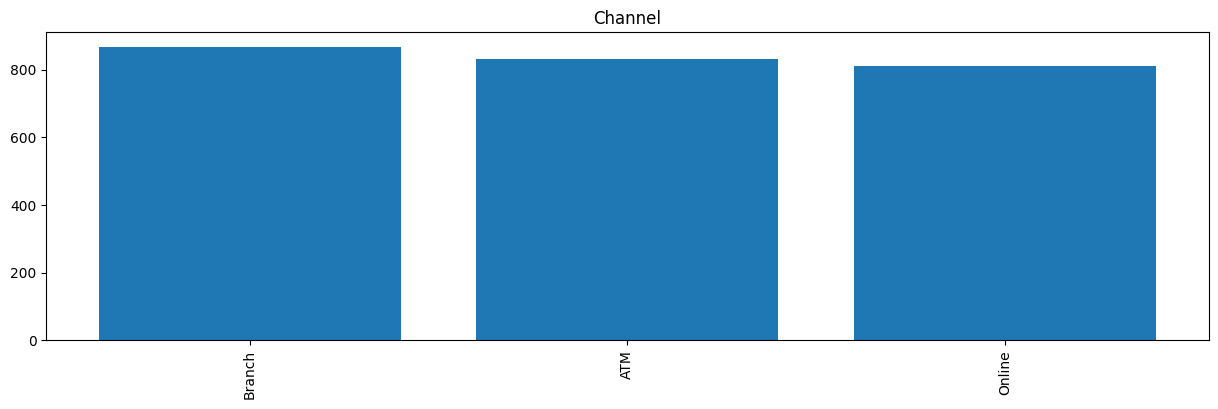

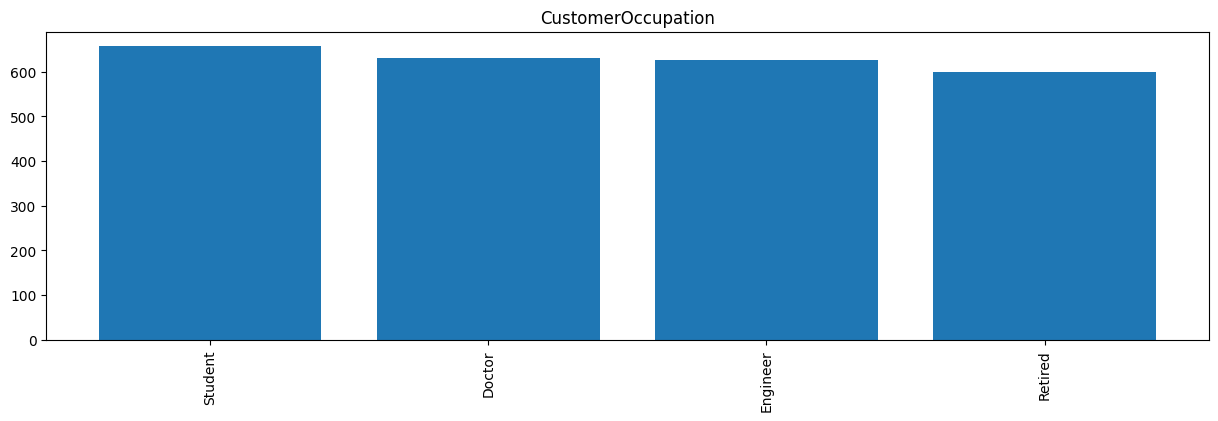

In [289]:
df_load_cat = df_load.select_dtypes(include='object').filter(regex='^(?!.*(ID|Date)).*')

for i, column in enumerate(df_load_cat, 1):
    plt.figure(figsize=(15, 4))
    val = df_load_cat[column].value_counts().head(50)
    plt.bar(val.index, val)
    plt.xticks(rotation=90)
    plt.title(column)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [290]:
print(df_load.isnull().sum(), df_load.duplicated().sum())
df_load.info()
df_load.describe(include='all')

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 n

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


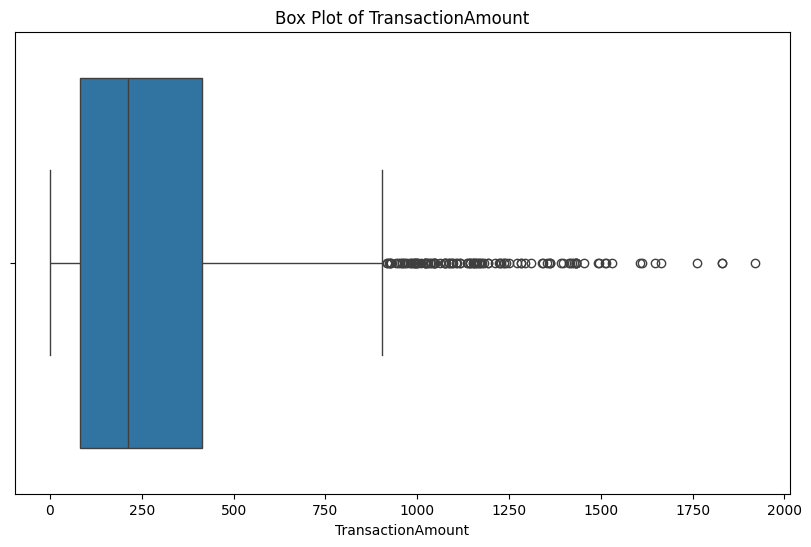

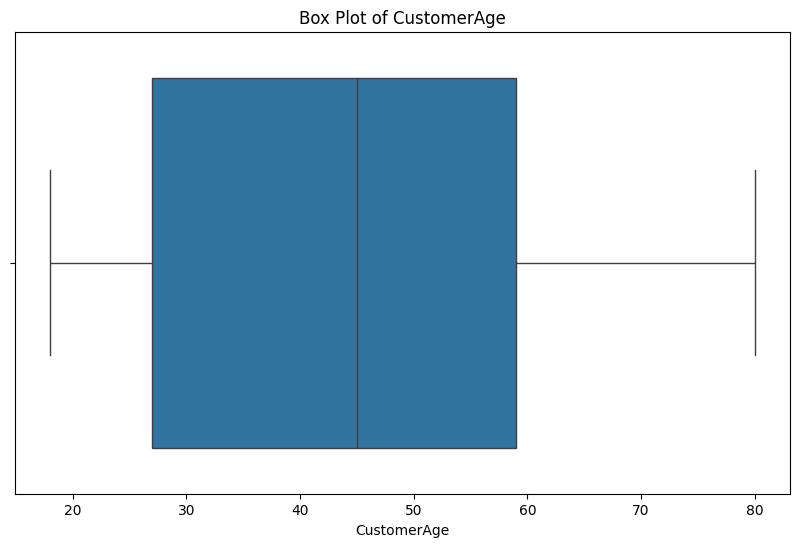

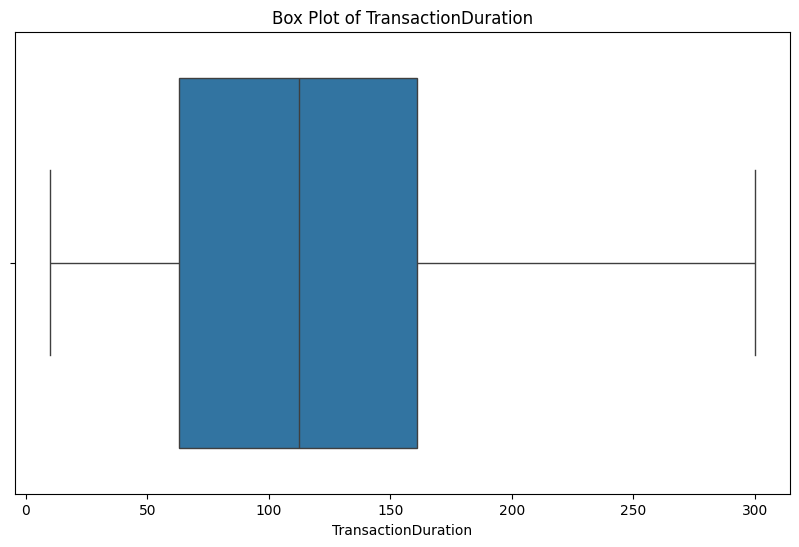

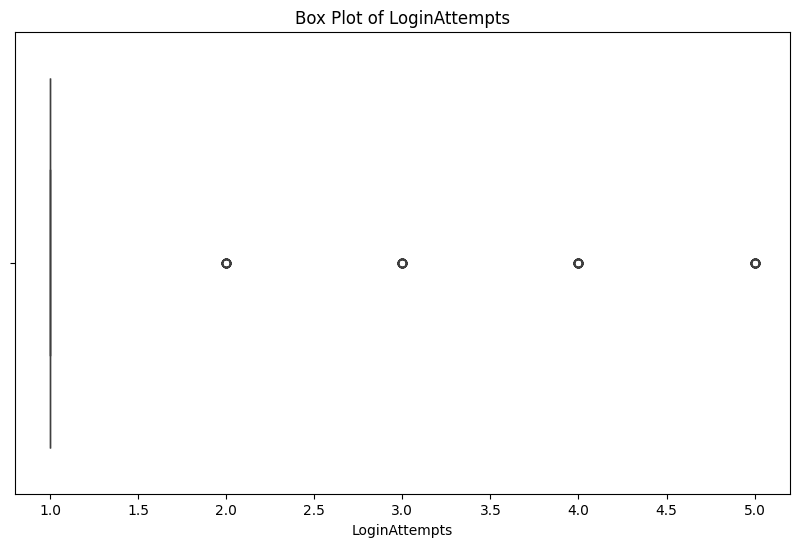

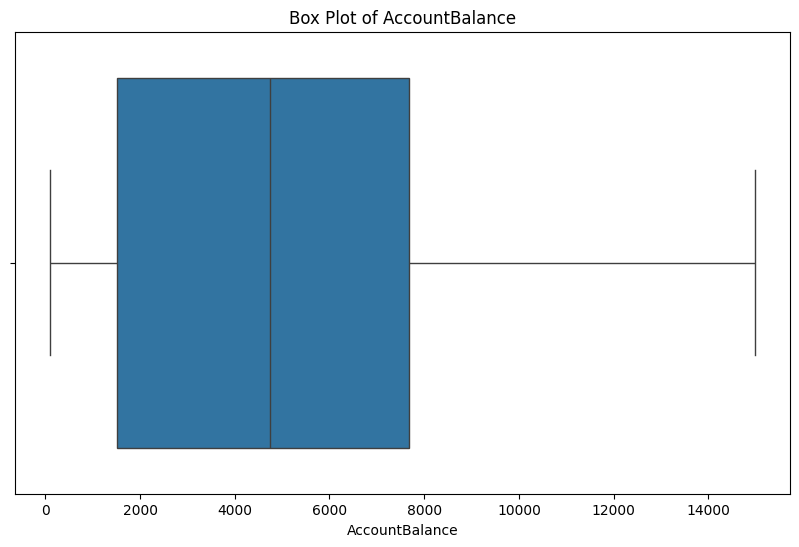

In [291]:
for feature in df_load_num:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_load_num[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [292]:
# Standarisasi: distribusi tidak ada yang terlalu skewed dan outlier yang ada tidak berarti, mengecilkan rentang data
scaler = StandardScaler()
df_load_num[df_load_num.columns] = scaler.fit_transform(df_load_num[df_load_num.columns])

In [317]:
df = df_load_num
df

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537
1,0.269440,1.311287,0.305314,-0.206794,2.216472
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589
...,...,...,...,...,...
2507,1.913802,-0.656259,-0.152156,-0.206794,1.942606
2508,-0.157779,0.186975,0.819969,-0.206794,-1.245986
2509,-0.921462,0.636700,0.376794,-0.206794,-0.443928
2510,-0.382420,-1.218415,-1.438793,-0.206794,-0.855705


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [294]:
# Menggunakan: DBSCAN efektif untuk mendeteksi penipuan karena kemampuannya mengidentifikasi outlier, mengatasi kebisingan, dan tidak mengharuskan pola penipuan membentuk kelompok bulat.
dbscan = DBSCAN(eps=1.5, min_samples=5) # Brute force manual hyperparameter tunning

In [295]:
labels = dbscan.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [296]:
valid_clusters = labels != -1

df_valid = df[valid_clusters]

"sebelum feature selection: " + str(silhouette_score(df_valid, dbscan.labels_[valid_clusters]))

'sebelum feature selection: 0.2088451806295725'

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [297]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df, labels)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = 0.05  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{df.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = df.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = df[important_features]  # Hanya fitur penting dari data pelatihan

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
TransactionAmount: 0.07064509232318417
LoginAttempts: 0.8416335256611039
AccountBalance: 0.050721517826106524

Dimensi data pelatihan dengan fitur penting: (2512, 3)


In [298]:
df_load_loc_encoded = df_load.Location.str.get_dummies()
df_load_loc_encoded

,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,Chicago,Colorado Springs,Columbus,Dallas,...,Raleigh,Sacramento,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tucson,Virginia Beach,Washington
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
# Memilih feature yang paling cocok untuk analisis fraud
df = pd.concat([df_load_num, df_load_loc_encoded], axis=1).drop(['CustomerAge'], axis=1)
df

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,...,Raleigh,Sacramento,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tucson,Virginia Beach,Washington
0,-0.971275,-0.552443,-0.206794,-0.000537,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.269440,0.305314,-0.206794,2.216472,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.586882,-0.909842,-0.206794,-1.023534,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.387456,-1.353017,-0.206794,0.885797,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.973468,1.120184,-0.206794,0.593589,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.913802,-0.152156,-0.206794,1.942606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2508,-0.157779,0.819969,-0.206794,-1.245986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2509,-0.921462,0.376794,-0.206794,-0.443928,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2510,-0.382420,-1.438793,-0.206794,-0.855705,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
labels = dbscan.fit_predict(df)

valid_clusters = labels != -1

df_valid = df[valid_clusters]

"setelah feature selection: " + str(silhouette_score(df_valid, dbscan.labels_[valid_clusters]))

'setelah feature selection: 0.7003142163935495'

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [313]:
df['cluster'] = labels

In [302]:
df.describe()

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,...,Sacramento,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tucson,Virginia Beach,Washington,cluster
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,...,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,-1.414297e-16,7.637203e-17,1.527441e-16,4.985396e-17,0.016322,0.024283,0.023487,0.020303,0.024283,0.02707,...,0.021099,0.023487,0.023487,0.022691,0.023487,0.024283,0.026672,0.021895,0.019108,-0.060510
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.126735,0.153958,0.151475,0.141061,0.153958,0.16232,...,0.143742,0.151475,0.151475,0.148946,0.151475,0.153958,0.161155,0.146370,0.136933,0.246685
min,-1.018657e+00,-1.567456e+00,-2.067936e-01,-1.285344e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-7.390118e-01,-8.097706e-01,-2.067936e-01,-9.255845e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.961881e-01,-1.021205e-01,-2.067936e-01,-9.712227e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.006114e-01,5.912336e-01,-2.067936e-01,6.575405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.555266e+00,2.578372e+00,6.431745e+00,2.529043e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


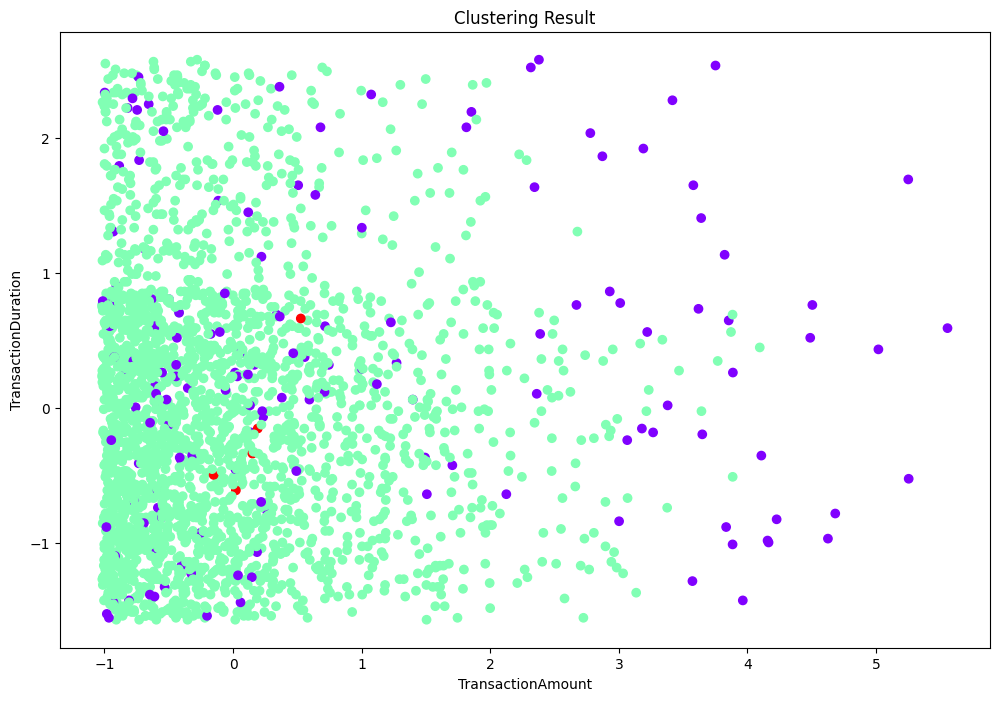

In [303]:
plt.figure(figsize=(12, 8))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='rainbow')
plt.xlabel('TransactionAmount')
plt.ylabel('TransactionDuration')
plt.title('Clustering Result')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [304]:
cluster_labels = {
    -1: 'Penipuan',
    0: 'Normal',
    1: 'Mencurigakan'
}

df['cluster'] = df['cluster'].map(cluster_labels)

In [305]:
df.groupby('cluster').count()

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,...,Raleigh,Sacramento,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tucson,Virginia Beach,Washington
cluster,,,,,,,,,,,,,,,,,,,,,
Mencurigakan,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Normal,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,...,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
Penipuan,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157


In [306]:
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id - 1]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data.iloc[:, 0].mean()  # Rata-rata Annual Income
        mean_spending = cluster_data.iloc[:, 1].mean()  # Rata-rata Spending Score
        mean_login_attempts = cluster_data.iloc[:, 2].mean()  # Rata-rata Login Attempts
        mean_balance = cluster_data.iloc[:, 3].mean()  # Rata-rata Balance

        print(f"\nCluster {cluster_labels[cluster_id - 1]}:")
        print(f"Rata-rata jumlah transaksi: {mean_income:.2f}")
        print(f"Rata-rata durasi transaksi: {mean_spending:.2f}")
        print(f"Rata-rata jumlah login attempts: {mean_login_attempts:.2f}")
        print(f"Rata-rata saldo: {mean_balance:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(df, labels, 3)

Analisis Karakteristik Setiap Cluster:

Cluster Penipuan:
Rata-rata jumlah transaksi: 0.88
Rata-rata durasi transaksi: 0.27
Rata-rata jumlah login attempts: 2.89
Rata-rata saldo: 0.22

Cluster Normal:
Rata-rata jumlah transaksi: -0.06
Rata-rata durasi transaksi: -0.02
Rata-rata jumlah login attempts: -0.21
Rata-rata saldo: -0.01

Cluster Mencurigakan:
Rata-rata jumlah transaksi: 0.15
Rata-rata durasi transaksi: -0.19
Rata-rata jumlah login attempts: 6.43
Rata-rata saldo: -0.77


Analisis Karakteristik Setiap Cluster:

1. Cluster Penipuan:
- Rata-rata jumlah transaksi: 0.80
- Rata-rata durasi transaksi: 0.26
- Rata-rata jumlah login attempts: 2.97
- Rata-rata saldo: 0.23
    - Analisis: Transaksi ini menggunakan jumlah transaksi yang besar dan durasi transaksi yang lama, terdeteksi melakukan login berulang ulang dan saldo setelah transaksi menambah secara tidak wajar

2. Cluster Normal:
- Rata-rata jumlah transaksi: -0.05
- Rata-rata durasi transaksi: -0.02
- Rata-rata jumlah login attempts: -0.21
- Rata-rata saldo: -0.01
    - Analisis: Transaksi ini menggunakan jumlah transaksi yang masuk akal dan durasi transaksi yang cepat, terdeteksi melakukan login sekali-dua kali dan saldo setelah transaksi berubah secara wajar

3. Cluster Mencurigakan:
- Rata-rata jumlah transaksi: 0.08
- Rata-rata durasi transaksi: -0.00
- Rata-rata jumlah login attempts: 6.43
- Rata-rata saldo: -0.82
    - Analisis: Transaksi ini menggunakan jumlah transaksi yang lumayan besar dan durasi transaksi yang cukup lama, terdeteksi melakukan login berkali kali dan saldo setelah transaksi berubah tidak wajar

Transaksi dilakukan dilokasi yang berbeda dan beberapa lokasi mungkin memiliki jumlah transaksi penipuan yang banyak. Contoh: di kota metropolitan, tingkat kriminalitas meningkat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [307]:
df.to_csv('fraud_clustering.csv', index=False)